In [215]:
%load_ext autoreload
%autoreload 2
import pipeline
import pandas as pd
import warnings
warnings.simplefilter('ignore')
df = pipeline.read_load('/Users/erhla/Downloads/projects_2012_2013.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [216]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['datefullyfunded'] = pd.to_datetime(df['datefullyfunded'])
df['days_to_fund'] = df['datefullyfunded'] - df['date_posted']
df['funded_within_60_days'] = pd.get_dummies(df['days_to_fund'] <= pd.Timedelta('60 days'), drop_first=True)

VARIABLE: total_price_including_optional_support 
 count    124976.000000
mean        654.011811
std        1098.015854
min          92.000000
25%         345.810000
50%         510.500000
75%         752.960000
max      164382.840000
Name: total_price_including_optional_support, dtype: float64 

VARIABLE: students_reached 
 count    124917.000000
mean         95.445760
std         163.481912
min           1.000000
25%          23.000000
50%          30.000000
75%         100.000000
max       12143.000000
Name: students_reached, dtype: float64 

VARIABLE: funded_within_60_days 
 count    124976.000000
mean          0.711865
std           0.452896
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: funded_within_60_days, dtype: float64 



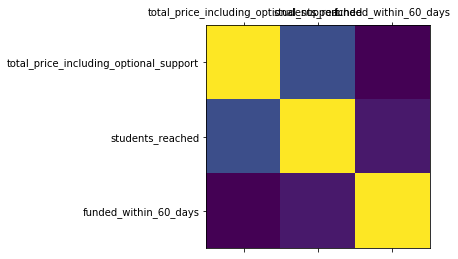

total_price_including_optional_support has possible outliers 402 

students_reached has possible outliers 993 



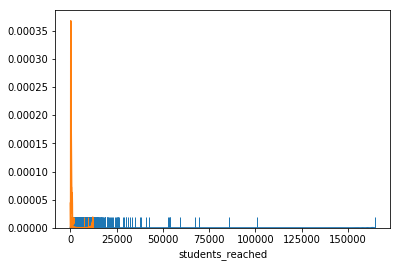

In [217]:
pipeline.explore(df, ['total_price_including_optional_support', 'students_reached', 'funded_within_60_days'])

In [218]:
df = pipeline.preprocess(df, ['students_reached'], ['primary_focus_area', 'resource_type', 'grade_level'])

53 nas filled for students_reached


In [219]:
feature_dict = {'students_reached': 'discretized',
                'total_price_including_optional_support': 'discretized',
                'school_charter': 'dummy',
                'school_magnet': 'dummy',
                'eligible_double_your_impact_match': 'dummy',
                'teacher_prefix': 'dummy',
                'poverty_level': 'dummy',
                'grade_level': 'dummy',
                'primary_focus_area': 'dummy',
                'resource_type': 'dummy'
               }
df = pipeline.generate_features(df, feature_dict, 10)

students_reached discretized
total_price_including_optional_support discretized
school_charter has values:  ['f' 't']
dummy created for school_charter
school_magnet has values:  ['f' 't']
dummy created for school_magnet
eligible_double_your_impact_match has values:  ['f' 't']
dummy created for eligible_double_your_impact_match
teacher_prefix has values:  ['Mrs.' 'Ms.' 'Mr.' 'Dr.']
target variable has more than two values, multiple dummies created
poverty_level has values:  ['highest poverty' 'high poverty' 'low poverty' 'moderate poverty']
target variable has more than two values, multiple dummies created
grade_level has values:  ['Grades PreK-2' 'Grades 3-5' 'Grades 9-12' 'Grades 6-8']
target variable has more than two values, multiple dummies created
primary_focus_area has values:  ['Math & Science' 'History & Civics' 'Literacy & Language'
 'Applied Learning' 'Music & The Arts' 'Health & Sports' 'Special Needs']
target variable has more than two values, multiple dummies created
resou

In [224]:
y = 'funded_within_60_days'
x = list(df.columns)
x.remove(y)
pipeline.define_models(df, x, y)


{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 10}
0.7125708249303755 0.8321650871978915 (array([0.71257082, 1.        ]), array([1., 0.]), array([1], dtype=uint8))
{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
0.7125708249303755 0.8321650871978915 (array([0.71257082, 1.        ]), array([1., 0.]), array([1], dtype=uint8))
{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 10}
0.6989340247767214 0.8108521207489492 (array([0.71257082, 0.73404217, 1.        ]), array([1.        , 0.90561545, 0.        ]), array([0, 1], dtype=uint8))
{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
0.704824098082525 0.816865603463685 (array([0.71257082, 0.73208501, 1.        ]), array([1.        , 0.92385445, 0.        ]), array([0, 1], dtype=uint8))
{'C': 0.001, 'penalty': 'l1'}
0.7125708249303755 0.8321650871978915 (array([0.71257082, 1.        ]), array([1., 0.]), array([1], dtype=uint8))
{'C': 0.001, 'penalty': 'l2'}
0.7126348474663081 0.8291299465138

KeyboardInterrupt: 

In [222]:
for col in df.columns:
    print(col, df[col].unique().size)
df.resource_type.unique()

students_reached 10
total_price_including_optional_support 10
school_charter 2
school_magnet 2
eligible_double_your_impact_match 2
funded_within_60_days 2
teacher_prefix_Dr. 2
teacher_prefix_Mr. 2
teacher_prefix_Mrs. 2
teacher_prefix_Ms. 2
poverty_level_high poverty 2
poverty_level_highest poverty 2
poverty_level_low poverty 2
poverty_level_moderate poverty 2
grade_level_Grades 3-5 2
grade_level_Grades 6-8 2
grade_level_Grades 9-12 2
grade_level_Grades PreK-2 2
primary_focus_area_Applied Learning 2
primary_focus_area_Health & Sports 2
primary_focus_area_History & Civics 2
primary_focus_area_Literacy & Language 2
primary_focus_area_Math & Science 2
primary_focus_area_Music & The Arts 2
primary_focus_area_Special Needs 2
resource_type_Books 2
resource_type_Other 2
resource_type_Supplies 2
resource_type_Technology 2
resource_type_Trips 2
resource_type_Visitors 2


AttributeError: 'DataFrame' object has no attribute 'resource_type'

## Build Classifier and Evaluate

These stages of the pipeline build the model using sklearn.tree.DecisionTreeClassifier. Withholding ten percent of the data as testing data, this block builds a decision tree with max_depth=4 and min_split_size=20.

This model evaluated on accuracy against the testing data has an accuracy of about 95%. Below is an image of the decision tree produced. An approximate table of contents for the features used to split the tree is provided below the model.

In [8]:
#see https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
for i, col in enumerate(x_test.columns):
    print('X_',i+1, col)